In [5]:
import pandas as pd
df=pd.read_csv('/content/insurance.csv')

In [6]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


Probability of at least 4 smokers (using formula): 0.35038928159999977
Probability of at least 4 smokers (using pbinom): 0.3503892815999998


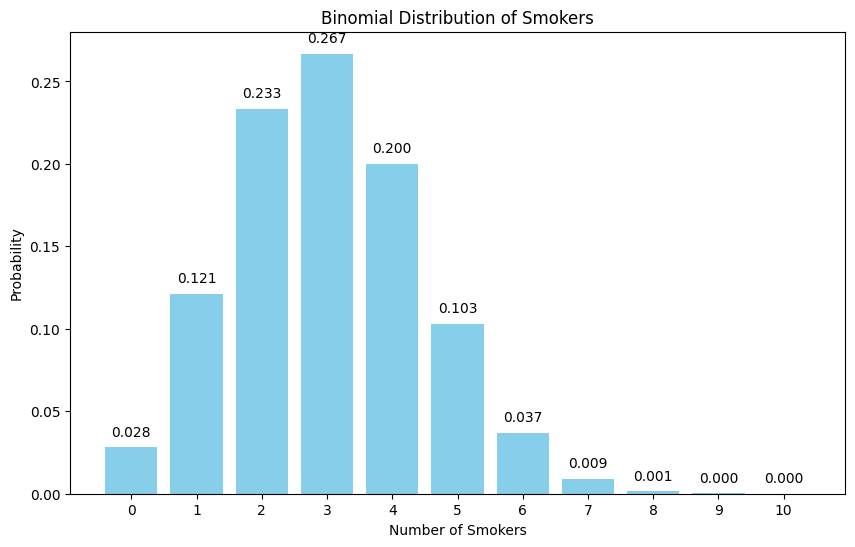

In [8]:
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# (a) Binomial Probability Calculation
n = 10  # Number of trials (individuals selected)
p = 0.3  # Probability of success (smoker)
k = 4   # Minimum number of smokers

# Using the Binomial Probability Distribution formula
probability = 0
for i in range(4, 11):
    probability += binom.pmf(i, n, p)

print(f"Probability of at least 4 smokers (using formula): {probability}")

# Using the pbinom function (cumulative probability)
probability_pbinom = 1 - binom.cdf(3, n, p)  # 1 - P(X <= 3)
print(f"Probability of at least 4 smokers (using pbinom): {probability_pbinom}")


# (b) Plot the Binomial Distribution
x = range(n + 1)  # Possible number of smokers (0 to 10)
probabilities = [binom.pmf(i, n, p) for i in x]

plt.figure(figsize=(10, 6))
plt.bar(x, probabilities, color='skyblue')
plt.title('Binomial Distribution of Smokers')
plt.xlabel('Number of Smokers')
plt.ylabel('Probability')
plt.xticks(x)  # Ensure all x-values are displayed

# Add probability labels to each bar
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.005, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

Probability of exactly 5 individuals with charges above $20,000: 0.10318229431910408
Cumulative probability of at most 5 individuals with charges above $20,000: 0.9389485703823359


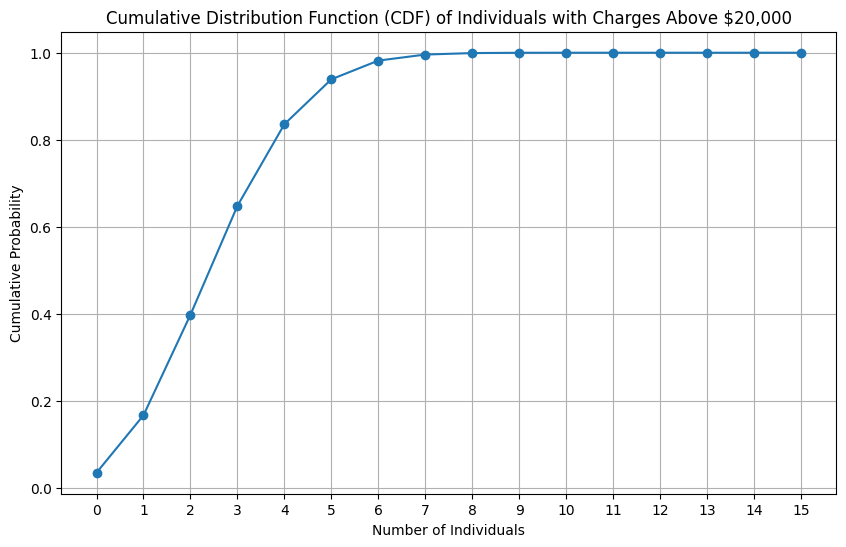

In [9]:
import pandas as pd
from scipy.stats import binom
import matplotlib.pyplot as plt

# (a) Probability of exactly 5 individuals with charges above $20,000
n_a = 15  # Number of trials
p_a = 0.2  # Probability of success (charges above $20,000)
k_a = 5   # Number of successes

probability_a = binom.pmf(k_a, n_a, p_a)
print(f"Probability of exactly 5 individuals with charges above $20,000: {probability_a}")

# (b) Cumulative probability of at most 5 individuals
probability_b = binom.cdf(k_a, n_a, p_a)
print(f"Cumulative probability of at most 5 individuals with charges above $20,000: {probability_b}")

# (c) Plot the cumulative probability distribution function (CDF)
x_c = range(n_a + 1)
probabilities_c = [binom.cdf(i, n_a, p_a) for i in x_c]

plt.figure(figsize=(10, 6))
plt.plot(x_c, probabilities_c, marker='o', linestyle='-')
plt.title('Cumulative Distribution Function (CDF) of Individuals with Charges Above $20,000')
plt.xlabel('Number of Individuals')
plt.ylabel('Cumulative Probability')
plt.xticks(x_c)
plt.grid(True)
plt.show()


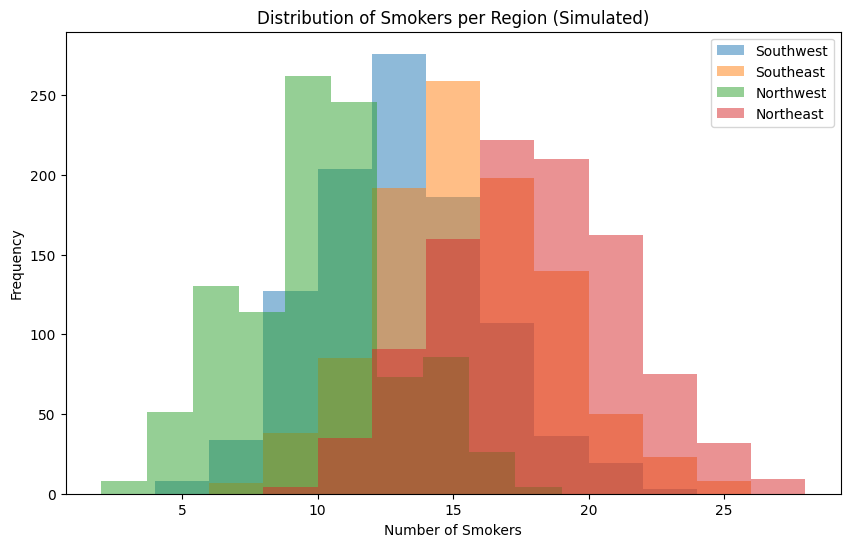

Southwest: Expected Smokers = 12.5
Southeast: Expected Smokers = 15.0
Northwest: Expected Smokers = 10.0
Northeast: Expected Smokers = 17.5

Comparison with Simulation Results:
Southwest: Simulated Average Smokers = 12.53
Southeast: Simulated Average Smokers = 15.02
Northwest: Simulated Average Smokers = 10.04
Northeast: Simulated Average Smokers = 17.41


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Simulate smoking data for each region
regions = {
    'Southwest': 0.25,
    'Southeast': 0.30,
    'Northwest': 0.20,
    'Northeast': 0.35
}
n = 50
num_samples = 1000

simulated_data = {}
for region, p in regions.items():
  simulated_data[region] = np.random.binomial(n, p, num_samples)

# (b) Visualize the distribution of smokers
plt.figure(figsize=(10, 6))
for region, smokers in simulated_data.items():
    plt.hist(smokers, alpha=0.5, label=region)

plt.title('Distribution of Smokers per Region (Simulated)')
plt.xlabel('Number of Smokers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# (c) Compute and compare expected values
expected_smokers = {}
for region, p in regions.items():
    expected_smokers[region] = n * p
    print(f'{region}: Expected Smokers = {expected_smokers[region]}')

print('\nComparison with Simulation Results:')
for region, smokers in simulated_data.items():
    print(f'{region}: Simulated Average Smokers = {np.mean(smokers):.2f}')


The threshold for a high-risk classification is 0.0
Probability of 8 high-risk individuals: 0.0057637902326630125


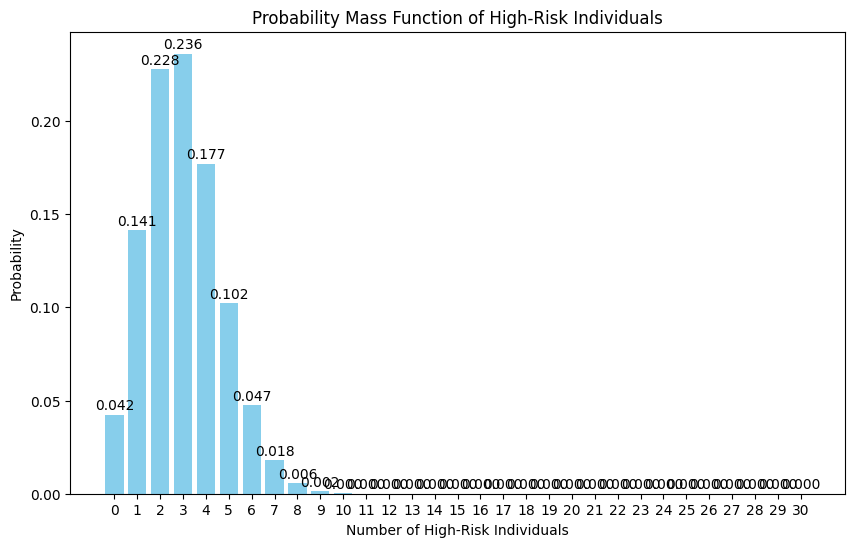

In [11]:
from scipy.stats import binom
import matplotlib.pyplot as plt

threshold_index = binom.ppf(0.9, 1, 0.1)

print(f"The threshold for a high-risk classification is {threshold_index}")

n_b = 30
k_b = 8
p_b = 0.1

probability_b = binom.pmf(k_b, n_b, p_b)
print(f"Probability of 8 high-risk individuals: {probability_b}")


# (c) Plot the PMF
x_c = range(n_b + 1)
probabilities_c = [binom.pmf(i, n_b, p_b) for i in x_c]

plt.figure(figsize=(10, 6))
plt.bar(x_c, probabilities_c, color='skyblue')
plt.title('Probability Mass Function of High-Risk Individuals')
plt.xlabel('Number of High-Risk Individuals')
plt.ylabel('Probability')
plt.xticks(x_c)

for i, prob in enumerate(probabilities_c):
    plt.text(i, prob + 0.001, f'{prob:.3f}', ha='center', va='bottom')

plt.show()


Probability of at least 5 individuals with more than 3 children (using pbinom): 0.5618217779200001
Probability of at least 5 individuals with more than 3 children (using formula): 0.5618217779200003


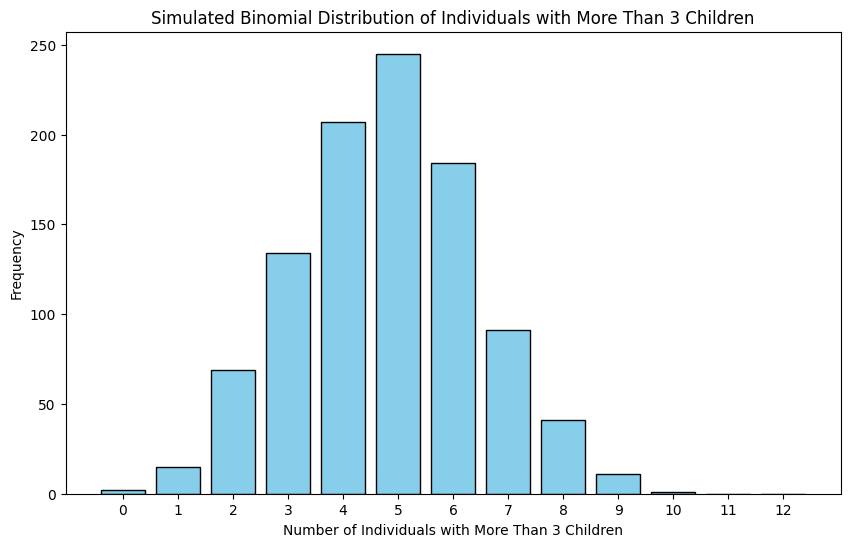

Simulated Mean: 4.786
Theoretical Mean: 4.800000000000001
Simulated Variance: 2.726204
Theoretical Variance: 2.8800000000000003


In [12]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 12
p = 0.4
k = 5

# Using pbinom
probability_pbinom = 1 - binom.cdf(4, n, p)
print(f"Probability of at least 5 individuals with more than 3 children (using pbinom): {probability_pbinom}")

# Using the Binomial formula
probability_formula = 0
for i in range(5, 13):
    probability_formula += binom.pmf(i, n, p)
print(f"Probability of at least 5 individuals with more than 3 children (using formula): {probability_formula}")


# (b) Simulate and visualize
num_simulations = 1000
simulated_data = np.random.binomial(n, p, num_simulations)

plt.figure(figsize=(10, 6))
plt.hist(simulated_data, bins=range(0, 14), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Simulated Binomial Distribution of Individuals with More Than 3 Children')
plt.xlabel('Number of Individuals with More Than 3 Children')
plt.ylabel('Frequency')
plt.xticks(range(0,13))
plt.show()


# (c) Compare mean and variance
simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data)

theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

print(f"Simulated Mean: {simulated_mean}")
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Simulated Variance: {simulated_variance}")
print(f"Theoretical Variance: {theoretical_variance}")
